<a href="https://colab.research.google.com/github/ThanatKam/Project/blob/main/Punching_Shear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Data set

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import random
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel,ExpSineSquared,Matern, RationalQuadratic, RBF, DotProduct
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn import svm,linear_model
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer,MaxAbsScaler,RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1vhqaOeLUM7cigbmbbiWjKAbWfP994989/export?format=csv&gid=1619620488'
df = pd.read_csv(url)
df.head()

189

In [ ]:
x = df[['Fc_MPa','S1_mm','S2_mm','c1_mm','c2_mm','d_mm','Ef_GPa','pf_%',]]
y = df['Vc_kN']
x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, random_state=00)

# Model Scoring

In [ ]:
result_df = pd.DataFrame()
result_df ['Vc_kN_Real'] = y
result_df

,Vc_kN_Real
0,93
1,78
2,96
3,99
4,65
...,...
184,79
185,107
186,57
187,79


In [ ]:
def score_model(model, label):
  ###Cross-validate a model with selected features
  valid_score_list = []
  # oof = np.zeros_like(y_train_valid)

  plt.figure(figsize=(5, 5))

  kf = KFold(shuffle=True, random_state=0)
  fold = 0
  for train_index, valid_index in kf.split(x_train_valid):
    x_train = x.iloc[train_index]
    x_valid = x.iloc[valid_index]
    y_train = y.iloc[train_index]
    y_valid = y.iloc[valid_index]

    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_valid_pred = model.predict(x_valid)

    train_R2 = r2_score(y_train, y_train_pred)
    valid_R2 = r2_score(y_valid, y_valid_pred)
    print(f"Fold {fold+1}: R2 on Validation set = {train_R2:.3f} {valid_R2:.3f}")
    fold += 1

    # oof[valid_index] = y_valid_pred
    valid_score_list.append(valid_R2)
    if fold == 4:
      plt.scatter(y_valid_pred, y_valid, s=5, c='b', label ="Validation set")
    else:
      plt.scatter(y_valid_pred, y_valid, s=5, c='b')


  avg_valid_R2 = sum(valid_score_list) / len(valid_score_list)
  print(f"Average R2 on Validation set from each Fold: {avg_valid_R2:.3f} {label}")

  ###Model scoring on test data
  y_test_pred = model.predict(x_test)

  test_R2 = r2_score(y_test, y_test_pred)
  print(f"R2 on Test set = {test_R2:.3f}")

  global result_df
  result_df[label] = model.predict(x)

  # pred vs real
  plt.scatter(y_test_pred, y_test, s=15, c='r', label = "Test set")
  # y=x line
  plt.plot([0,y.max()],[0,y.max()], alpha=0.8, linewidth = 1, c='y', label = "y = x")
  # trend line
    # calculate equation for trendline
  z = np.polyfit(y_test_pred, y_test, 1)
  slope =z[0]
  p = np.poly1d(z)

  # add trendline to plot
  plt.plot([0,1],[0,1], c='red', label = f"y = {slope:.3f}x")
  plt.plot([0,1],[0,1], c='white', label = f"R2 = {test_R2:.3f}")
  plt.plot(x, p(x), alpha = 0.35, linewidth = 1, c='red')

  plt.xlabel('Predicted Strength (kN)')
  plt.ylabel('Measured Strength (kN)')
  plt.axis('equal')
  plt.title(label)
  plt.legend()

  plt.xlim(0,y.max())
  plt.ylim(0,y.max())

  plt.show()

# GPR Modeling (R2 = 0.878)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Fold 1: R2 on Validation set = 0.976 0.882
Fold 2: R2 on Validation set = 0.992 0.798


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Fold 3: R2 on Validation set = 0.978 0.843
Fold 4: R2 on Validation set = 0.984 0.832


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Fold 5: R2 on Validation set = 0.972 0.801
Average R2 on Validation set from each Fold: 0.831 GPR
R2 on Test set = 0.878


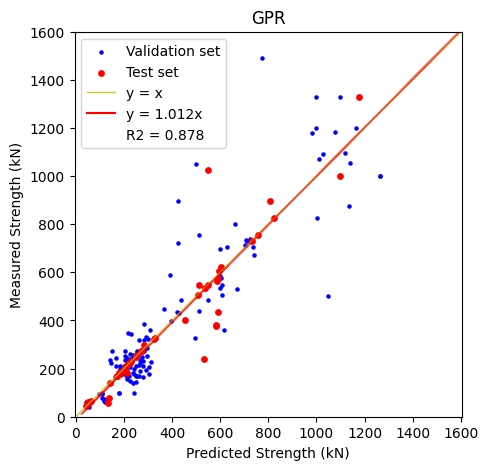

In [ ]:
kernel = RationalQuadratic() * ConstantKernel()
alpha = 0.25
GPR = GaussianProcessRegressor(kernel = kernel, alpha = alpha,random_state=00)

score_model(model = GPR,label='GPR')

# XGBoost (R2 = 0.764)

Fold 1: R2 on Validation set = 0.976 0.893
Fold 2: R2 on Validation set = 0.992 0.804
Fold 3: R2 on Validation set = 0.978 0.854
Fold 4: R2 on Validation set = 0.984 0.824
Fold 5: R2 on Validation set = 0.972 0.871
Average R2 on Validation set from each Fold: 0.849 XGB
R2 on Test set = 0.764


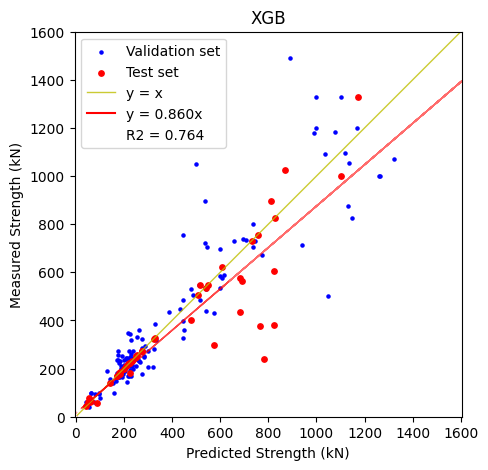

In [ ]:
XGBR = xgb.XGBRegressor(n_estimators=10000, max_depth=23, eta=0.01, subsample=0.7, colsample_bytree=0.8)

score_model(model = XGBR,label='XGB')

# LightGBM (R2 = 0.816)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 8
[LightGBM] [Info] Start training from score 393.392857
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

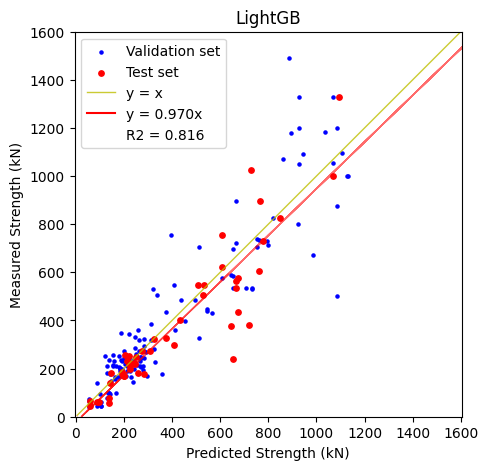

In [ ]:
LGBMR = LGBMRegressor()

score_model(model = LGBMR,label='LightGB')

#Linear (R2 = 0.719)

Fold 1: R2 on Validation set = 0.841 0.817
Fold 2: R2 on Validation set = 0.855 0.725
Fold 3: R2 on Validation set = 0.829 0.842
Fold 4: R2 on Validation set = 0.837 0.832
Fold 5: R2 on Validation set = 0.864 0.626
Average R2 on Validation set from each Fold: 0.768 LR
R2 on Test set = 0.719


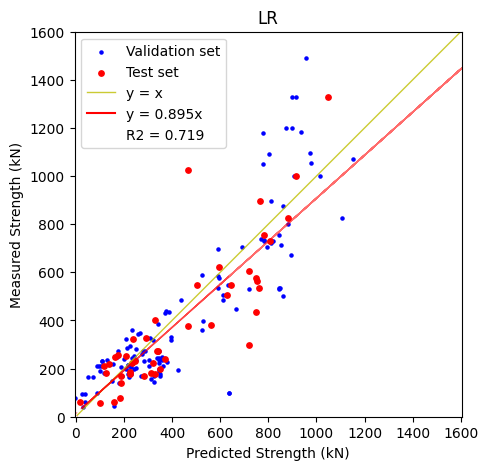

In [ ]:
LR = linear_model.LinearRegression()

score_model(model = LR,label='LR')